(45215, 17)
(45207, 17)
subindices de job :18
subindices de marital :6
subindices de education :10
subindices de default :2
subindices de housing :2
subindices de loan :6
subindices de contact :5
subindices de month :12
subindices de poutcome :6
subindices de y :2
(45207, 17)
(45203, 17)
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


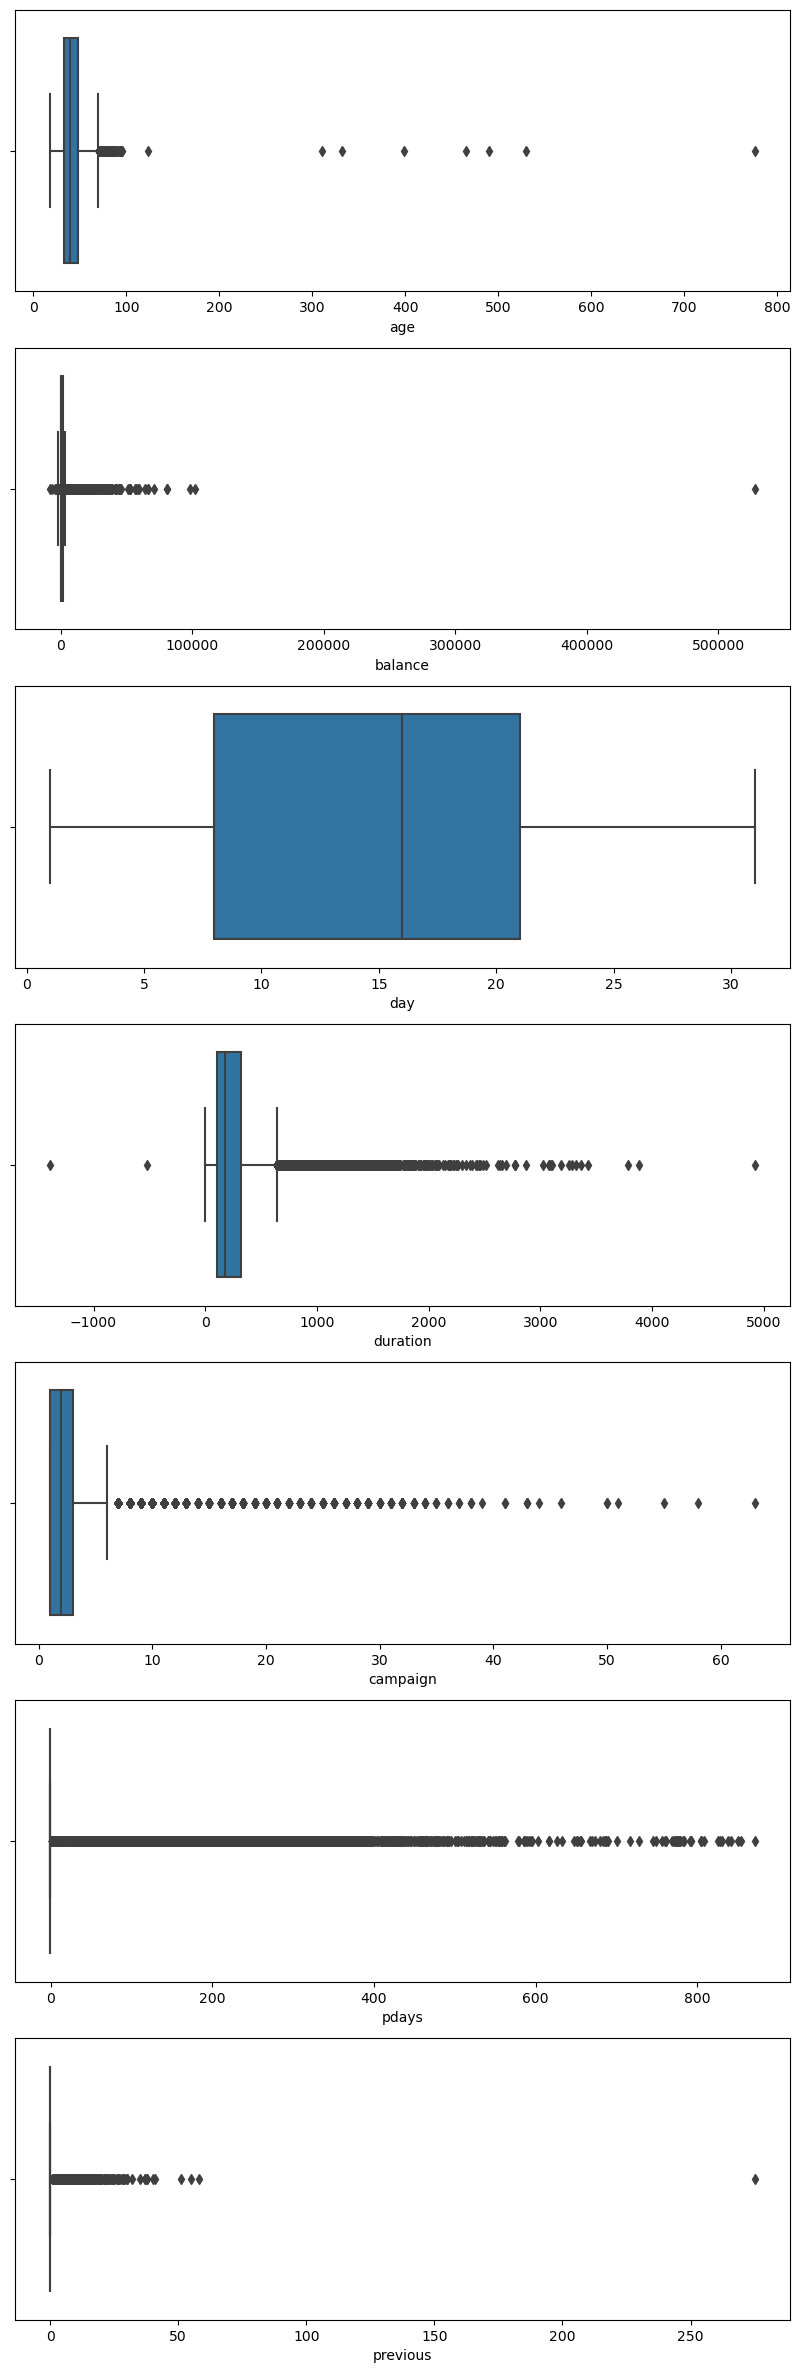

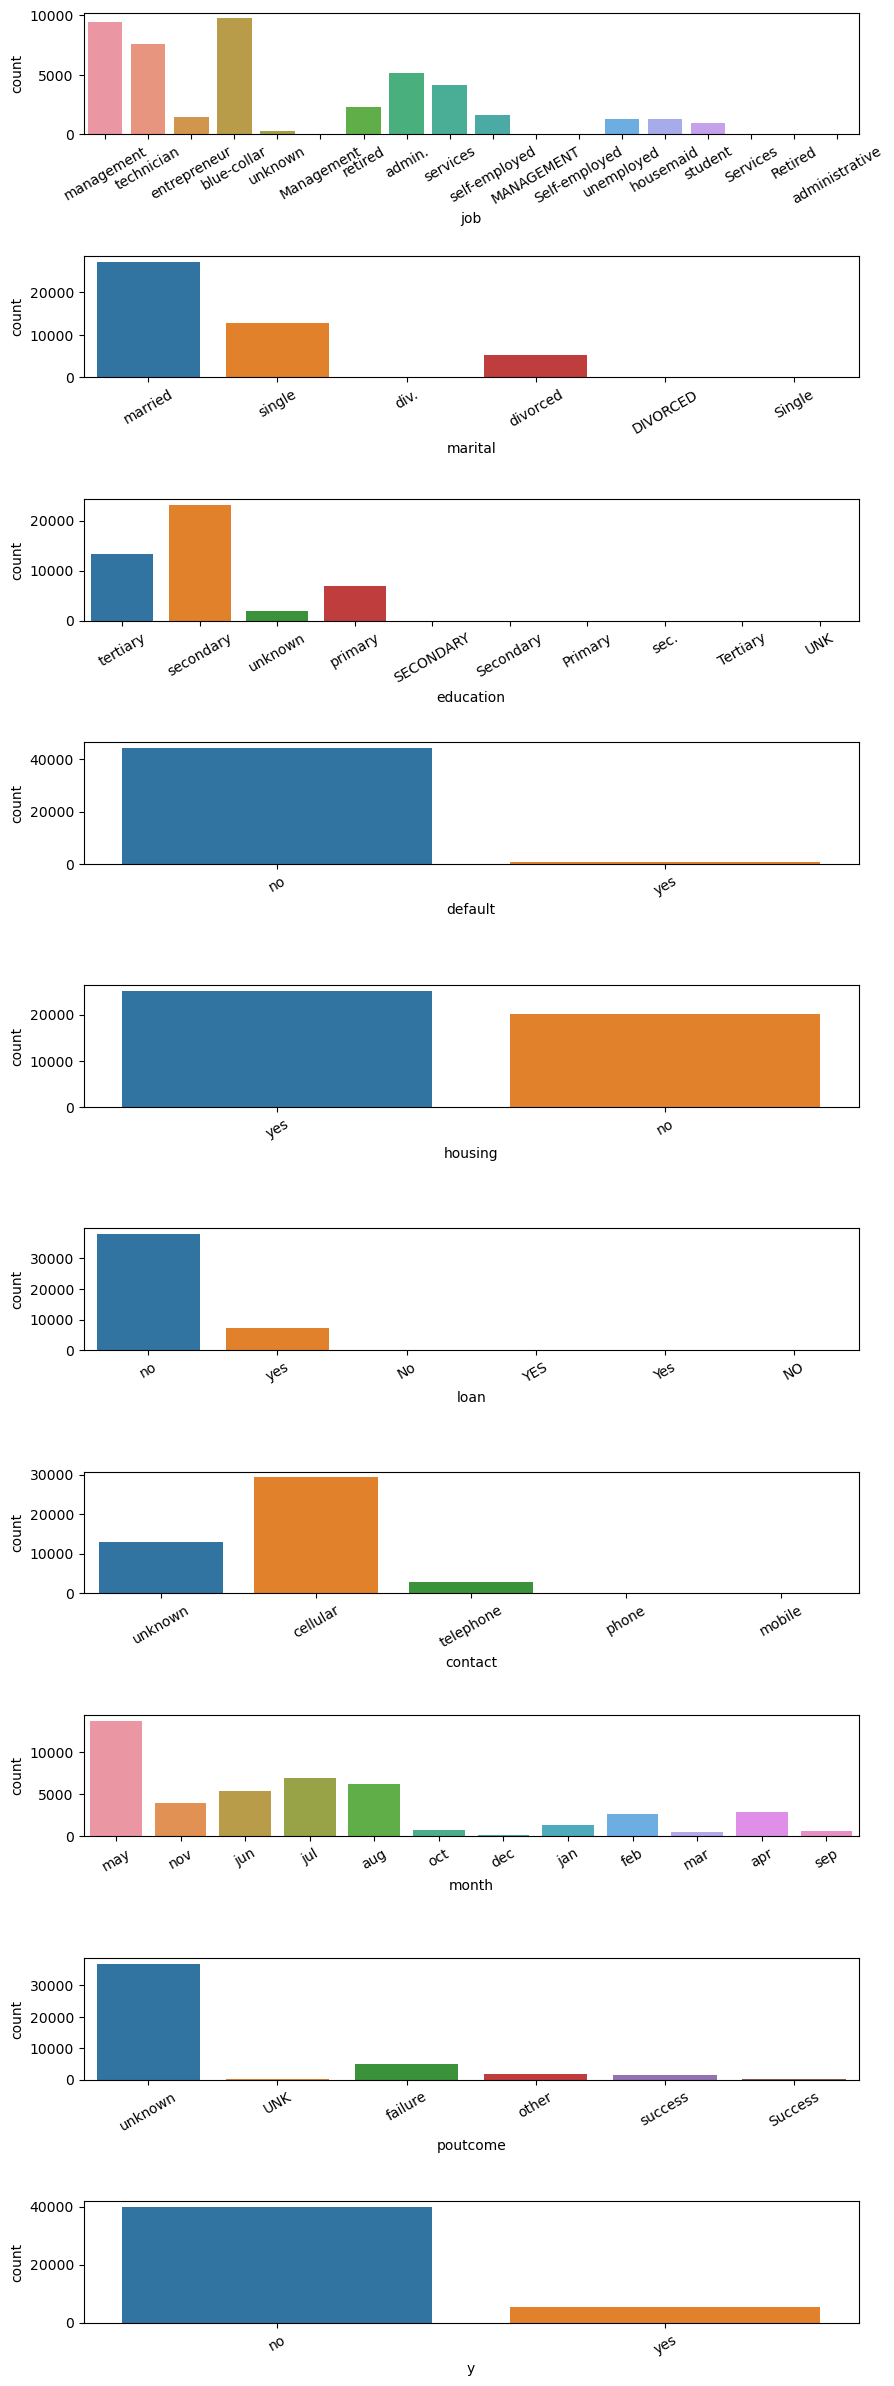

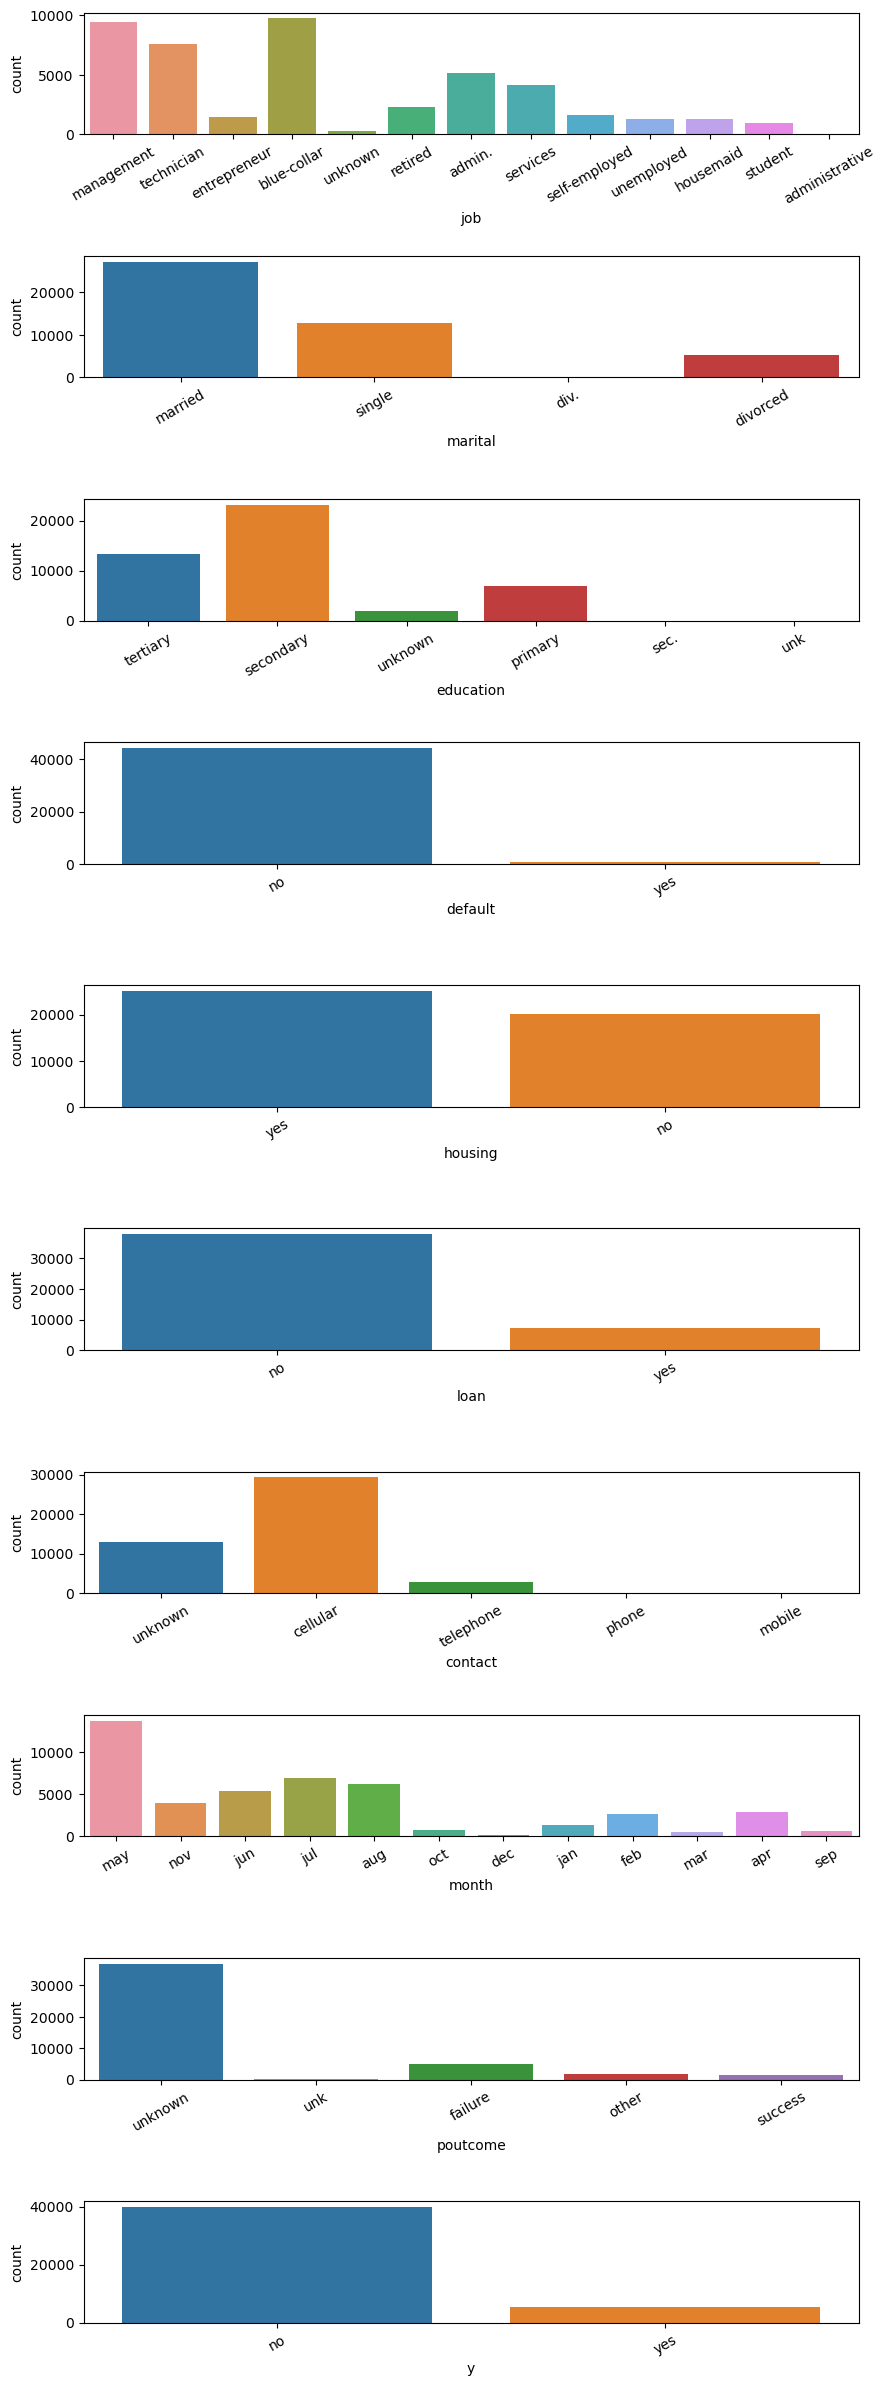

In [42]:
#importar librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#leer archivo csv
df=pd.read_csv('/home/kali/datascience/data/dataset_banco.csv')

#ver datos
#print(df.head())
#print(df.info())
#print(df.describe())

#ver variables categoricas y numericas 
ind_cat=df.select_dtypes(include=['object']).columns
ind_num=df.select_dtypes(include=['int','float']).columns

#datos faltantes
print(df.shape)
df.dropna(inplace=True) 
print(df.shape)

#conteo en los niveles de las diferentes columnas categoricas y numericas
for i in ind_cat:
    print(f'subindices de {i} :{df[i].nunique()}')



#filas repetidas
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

#generar graficas individuales pues las variables numericas
fig,ax =plt.subplots(nrows=len(ind_num),ncols=1,figsize=(10,30))
#estan en rangos diferentes
for i,j in enumerate(ind_num):
    sns.boxplot(x=j,data=df,ax=ax[i])

#eliminar filas con 'age'>100
df=df[df['age']<100]

#eliminar filas con 'diration'<0
df=df[df['duration']>0]

#eliminar filas con 'previous'>100
df=df[df['previous']<100]

#graficar los subniveles de cada variables categorica 
fig,ax=plt.subplots(nrows=len(ind_cat),ncols=1,figsize=(10,30),
                    gridspec_kw={'hspace':1})
for i,j in enumerate(ind_cat):
    sns.countplot(x=j,data=df,ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

#representar en minusculas solo si la columna es categorica
for col in ind_cat:
    df[col]=df[col].str.lower()

#y generamos las graficas nuevamente
fig,ax=plt.subplots(nrows=len(ind_cat),ncols=1,figsize=(10,30),
                    gridspec_kw={'hspace':1})
for i,j in enumerate(ind_cat):
    sns.countplot(x=j,data=df,ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

#job: unificar admin. y administrative'
print(df['job'].unique())
df['job']=df['job'].str.replace('admin.','administrative',regex=False) 
print(df['job'].unique())

#marital: unificar div, y divorced 
print(df['marital'].unique())
df['marital']=df['marital'].str.replace('div.','divorced',regex=False)
print(df['marital'].unique())

#educacion: unificar sec. y secondaty, unk y unknown
print(df['education'].unique())
df['education']=df['education'].str.replace('sec.','secondary',regex=False)
df.loc[df['education']=='unk','education']='unknown'
print(df['education'].unique())

#contact: unificar telephone y phone
df.loc[df['contact']=='phone','contact']='telephone'
df.loc[df['contact']=='mobile','contact']='telephone'

#poutcome: unificar unk y unknown
df.loc[df['poutcome']=='unk','poutcome']='unknown'



In [43]:
df.shape

(45189, 17)

In [44]:
df.to_csv('data_cleaning2.csv')